In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
office_episodes = []

# For every season in the series-- range depends on the show
for sn in range(1,10):
    # Request from the server the content of the web page by using get(), and store the server’s response in the variable response
    response = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compiling the episode info
            episode_data = [season, episode_number, title, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            office_episodes.append(episode_data)

In [3]:
import pandas as pd 
office_episodes = pd.DataFrame(office_episodes, columns = ['season', 'episode_number', 'title', 'rating', 'total_votes', 'Description'])

office_episodes.head()

,season,episode_number,title,rating,total_votes,Description
0,1,1,Pilot,7.5,"(5,562)",The premiere episode introduces the boss and s...
1,1,2,Diversity Day,8.3,"(5,424)",Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,7.8,"(4,546)",Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,8.0,"(4,428)","Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,8.4,"(4,861)",Michael and his staff challenge the warehouse ...


Data Cleaning

In [4]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [5]:
office_episodes['total_votes'] = office_episodes.total_votes.apply(remove_str).astype(int)

office_episodes.head()

,season,episode_number,title,rating,total_votes,Description
0,1,1,Pilot,7.5,5562,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,8.3,5424,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,7.8,4546,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,8.0,4428,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,8.4,4861,Michael and his staff challenge the warehouse ...


In [6]:
office_episodes['rating'] = office_episodes.rating.astype(float)

In [7]:
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          188 non-null    int64  
 1   episode_number  188 non-null    object 
 2   title           188 non-null    object 
 3   rating          188 non-null    float64
 4   total_votes     188 non-null    int64  
 5   Description     188 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.9+ KB


# EDA

highest rated episode

In [10]:
office_episodes.sort_values(by=['rating'], ascending=False)

,season,episode_number,title,rating,total_votes,Description
187,9,23,Finale,9.8,11899,"One year later, Dunder Mifflin employees past ..."
137,7,21,"Goodbye, Michael",9.8,9336,As the office gets ready for Michael's final d...
77,5,13,Stress Relief,9.7,9302,Dwight's too-realistic fire alarm gives Stanle...
186,9,22,A.A.R.M.,9.5,4568,Dwight prepares for a marriage proposal and hi...
59,4,9,Dinner Party,9.5,6401,Michael invites Jim and Pam and Andy and Angel...
...,...,...,...,...,...,...
161,8,21,Angry Andy,7.0,2437,"Andy and Erin return to Dunder Mifflin, only t..."
160,8,20,Welcome Party,7.0,2270,Andy tries to break up with his girlfriend aft...
104,6,14,The Banker,6.8,3467,A banker representing a potential buyer comes ...
148,8,8,Gettysburg,6.8,2423,Andy decides to motivate and inspire everyone ...


In [13]:
office_episodes.sort_values(by=['total_votes','rating' ], ascending=False)

,season,episode_number,title,rating,total_votes,Description
187,9,23,Finale,9.8,11899,"One year later, Dunder Mifflin employees past ..."
137,7,21,"Goodbye, Michael",9.8,9336,As the office gets ready for Michael's final d...
77,5,13,Stress Relief,9.7,9302,Dwight's too-realistic fire alarm gives Stanle...
59,4,9,Dinner Party,9.5,6401,Michael invites Jim and Pam and Andy and Angel...
132,7,16,Threat Level Midnight,9.4,5572,"Michael finally finishes his movie ""Threat Lev..."
...,...,...,...,...,...,...
154,8,14,Special Project,7.7,2178,Andy puts Dwight in charge of a special projec...
171,9,7,The Whale,7.6,2163,The office trains Dwight to sell to a female c...
178,9,14,Vandalism,7.4,2159,Pam tries to find out who vandalized her mural...
177,9,13,Junior Salesman,7.5,2157,Dwight gets to hire a new salesman to replace ...


lowest rated episode

In [11]:
office_episodes.sort_values(by=['rating'])

,season,episode_number,title,rating,total_votes,Description
159,8,19,Get the Girl,6.5,2561,Andy goes to Tallahassee to tell Erin that he ...
104,6,14,The Banker,6.8,3467,A banker representing a potential buyer comes ...
148,8,8,Gettysburg,6.8,2423,Andy decides to motivate and inspire everyone ...
160,8,20,Welcome Party,7.0,2270,Andy tries to break up with his girlfriend aft...
161,8,21,Angry Andy,7.0,2437,"Andy and Erin return to Dunder Mifflin, only t..."
...,...,...,...,...,...,...
59,4,9,Dinner Party,9.5,6401,Michael invites Jim and Pam and Andy and Angel...
186,9,22,A.A.R.M.,9.5,4568,Dwight prepares for a marriage proposal and hi...
77,5,13,Stress Relief,9.7,9302,Dwight's too-realistic fire alarm gives Stanle...
137,7,21,"Goodbye, Michael",9.8,9336,As the office gets ready for Michael's final d...


Average ratings per season

In [18]:
office_episodes.groupby('season').mean()['rating']

season
1    7.950000
2    8.436364
3    8.591304
4    8.571429
5    8.500000
6    8.184615
7    8.304167
8    7.583333
9    7.900000
Name: rating, dtype: float64

Ratings plotted against their total votes

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='total_votes'>

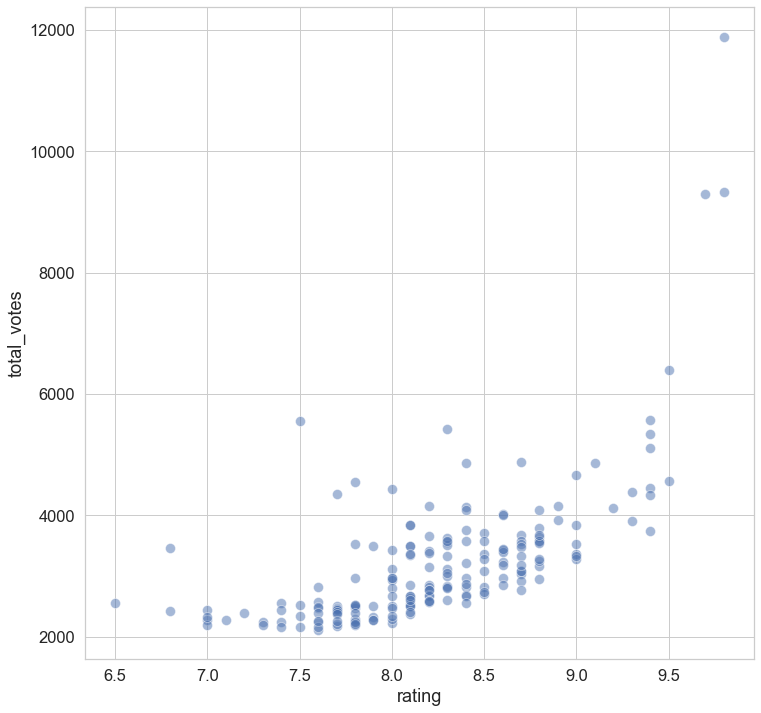

In [14]:
sns.set(font_scale=1.5,style='whitegrid')
plt.figure(figsize=(12,12))
sns.scatterplot(office_episodes.rating,office_episodes.total_votes,alpha=0.5,s=100)

Heatmap of the ratings per episode

In [19]:
office_episodes['episode_number'] = office_episodes['episode_number'].apply(lambda num: num.zfill(2))

In [20]:
office_episodes_heat = pd.pivot_table(data=office_episodes,index=['season'],columns=['episode_number'],values=['rating'])

In [28]:
office_episodes.groupby('season').count()[['episode_number']]

,episode_number
season,
1,6
2,22
3,23
4,14
5,26
6,26
7,24
8,24
9,23


In [37]:
episodenum = [*range(1,27)]
episodenum = [str(x) for x in episodenum]
episodenum

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26']

In [38]:
seasonticks = [*range(1,10)]
seasonticks = ['Season '+str(x) for x in seasonticks]
seasonticks

['Season 1',
 'Season 2',
 'Season 3',
 'Season 4',
 'Season 5',
 'Season 6',
 'Season 7',
 'Season 8',
 'Season 9']

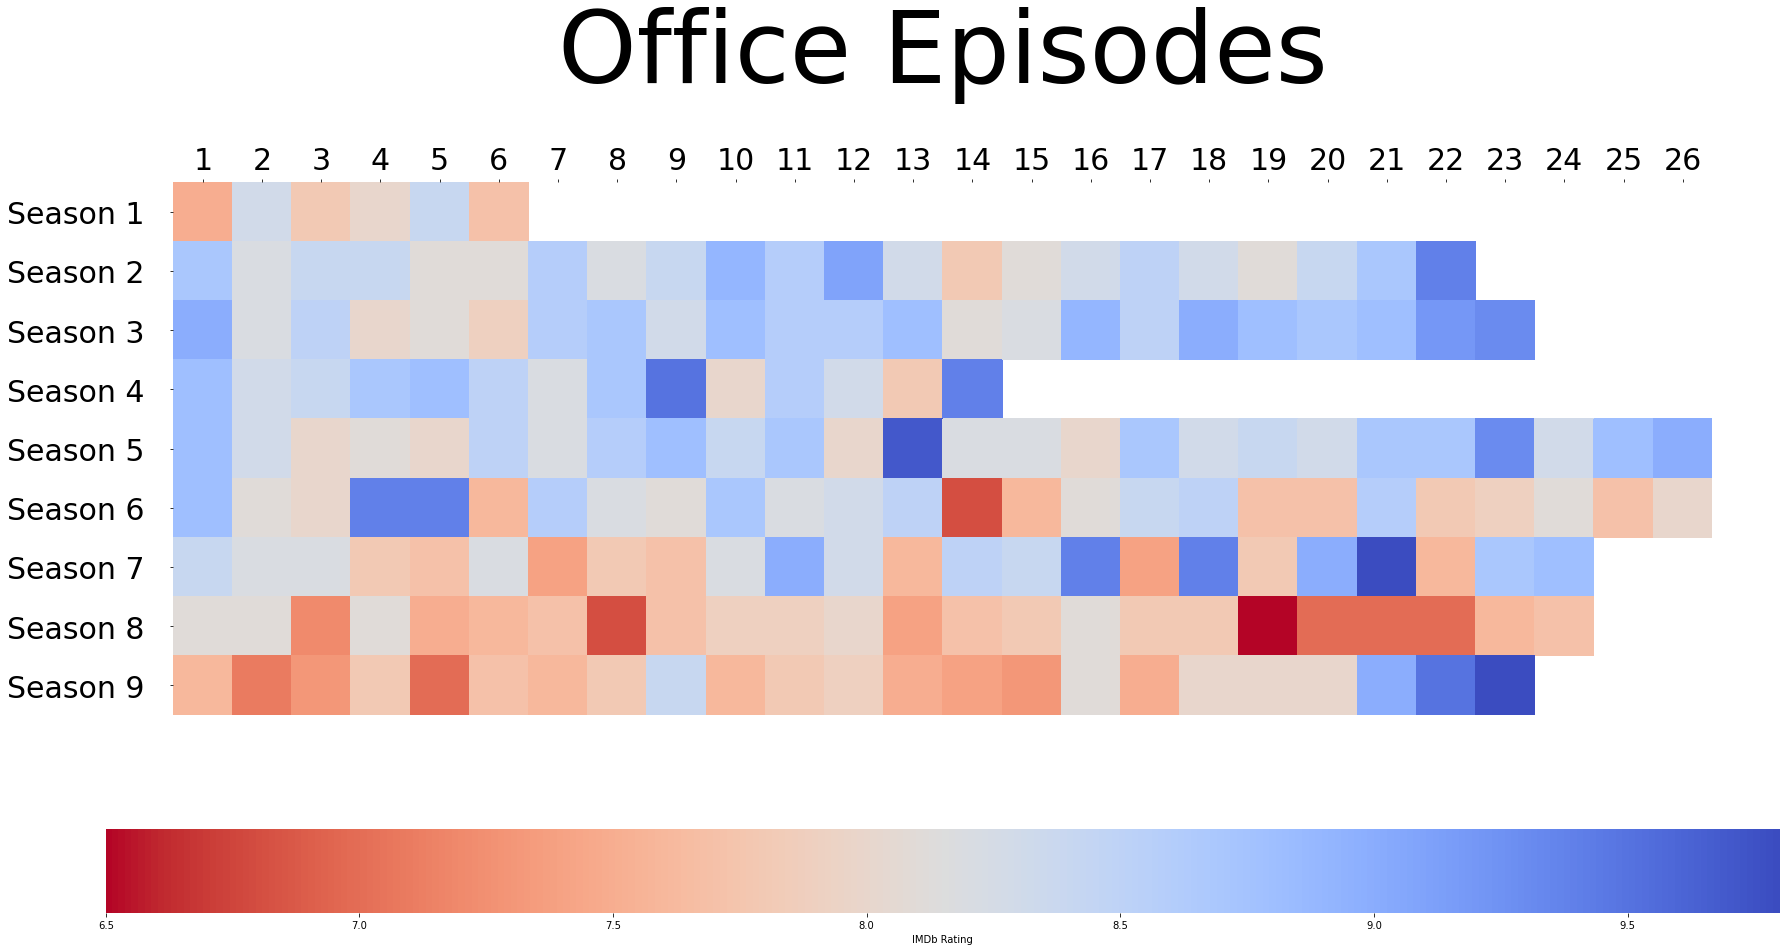

In [40]:
plt.figure(figsize=(30,14))
fg = sns.heatmap(office_episodes_heat,cmap='coolwarm_r', cbar_kws={'orientation': 'horizontal', 'label': 'IMDb Rating'}, square=True)

# Moving the x-axis ticks to the top
fg.xaxis.tick_top()
fg.set_xticklabels(episodenum,fontsize=30)
fg.set_yticklabels(seasonticks, rotation=360, horizontalalignment='right',fontsize=30)
# Adding more space between the y tick labels and the heatmap
fg.tick_params(axis='y', which='major', pad=25)
fg.set_ylabel('')    
fg.set_xlabel('')
fg.set_title('Office Episodes',fontsize=100,pad=100)

plt.show()

In [41]:
import seaborn as sns

Text(0, 0.5, '')

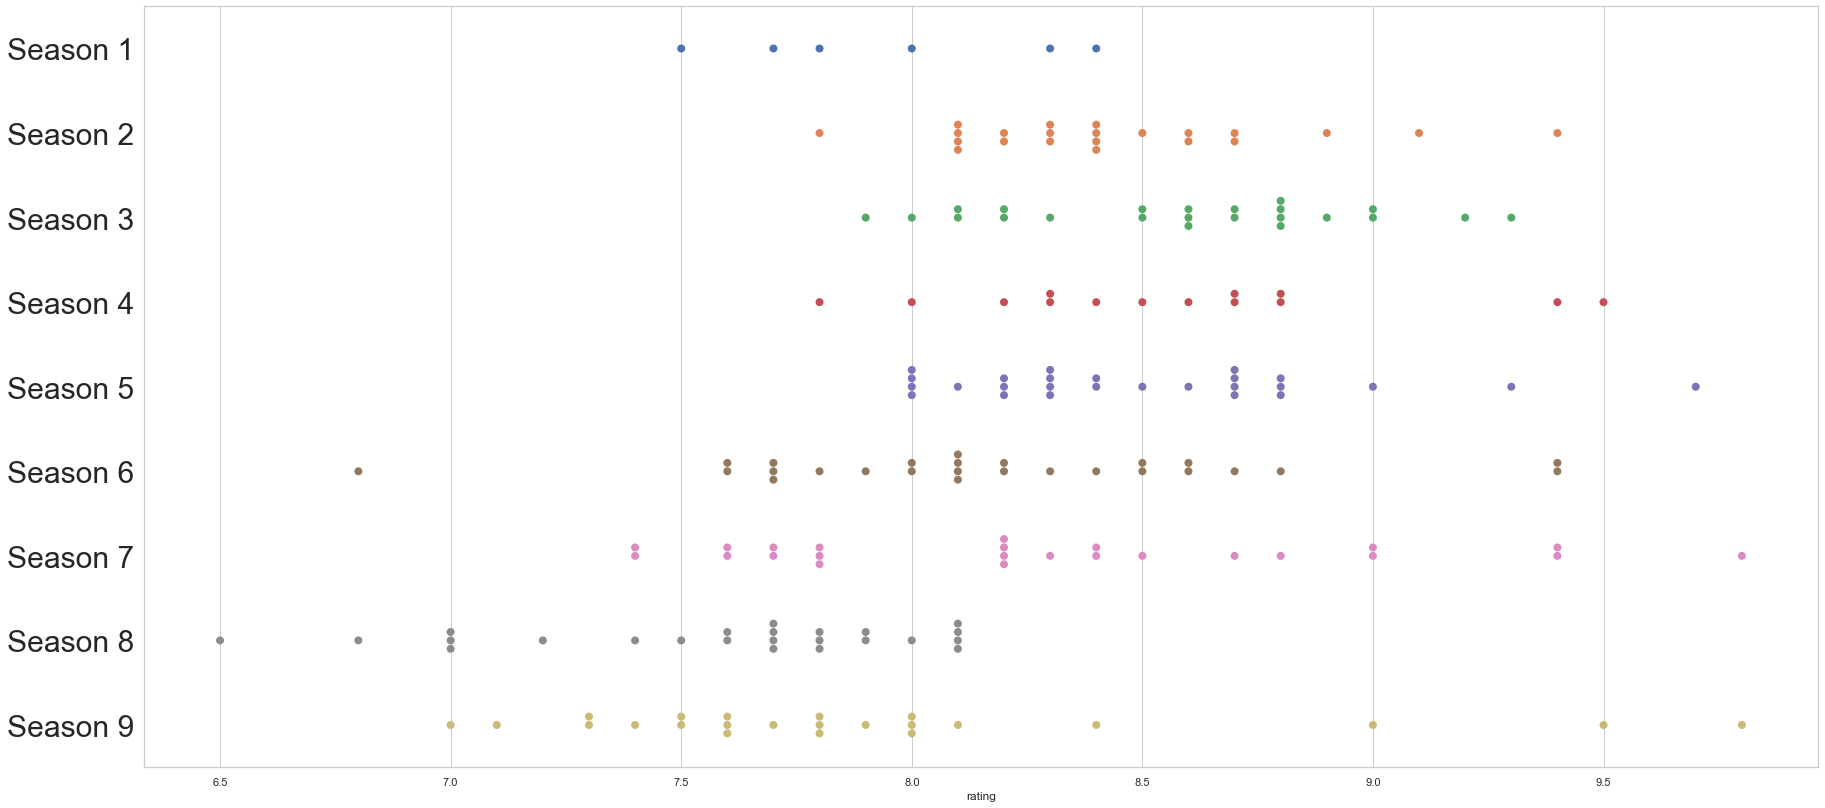

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(30,14))
ax = sns.swarmplot(x="rating", y="season", data=office_episodes, size = 8)
#ax.set_xticklabels(fontsize=30)
ax.set_yticklabels(seasonticks, rotation=360, horizontalalignment='right',fontsize=30)
ax.set_ylabel('') 

In [52]:
office_episodes.to_csv('Office_Episodes_IMDb_Ratings.csv',index=False)